800
done


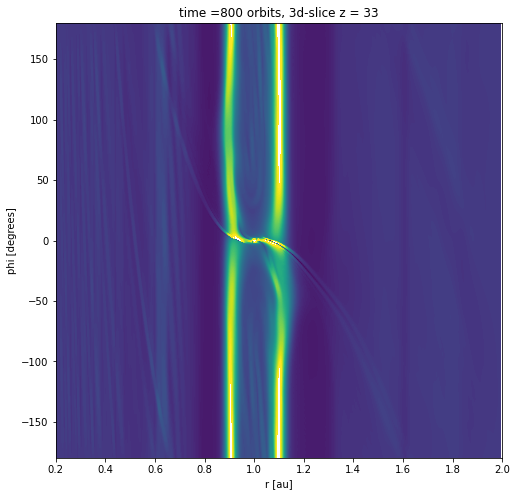

In [82]:
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './p3disof_test/'
#path = './bae2017_03jup1400x512/'

nstart = 80
itime = nstart
r0 = 1.0
fargo3d    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=True,dir=path)
fargo3d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path)
#fargo_2d = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
#fargo_2dinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)



phi = np.loadtxt(path +'domain_x.dat')
rad1  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                  \     $

rad1   = 0.5*(rad1[:-1] + rad1[1:])

rad2d, phi2d = np.meshgrid(rad1, phi) #explain meshgrid?                                                                                                                 \     $


X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad1)
nz = len(fargo3d.theta)
nf = nstart
print(nf*10)
#-------------------------3d sum------------------
#rho_init   = fargo3d_init.rho.sum(axis=2)
#rho   = fargo3d.rho.sum(axis=2)
#vphi_init   = fargo3d_init.vphi.sum(axis=2)
#vphi   = fargo3d.vphi.sum(axis=2)
#vrad     = fargo3d.vr.sum(axis=2)
#vrad_init = fargo3d_init.vr.sum(axis=2)
#vtheta = fargo3d.vtheta.sum(axis=2)
#vtheta_init = fargo3d_init.vtheta.sum(axis=2)
#-------------------------3d slice------------------
rho_init   = fargo3d_init.rho[:,:,33]
rho   = fargo3d.rho[:,:,33]
vphi_init   = fargo3d_init.vphi[:,:,33]
vphi   = fargo3d.vphi[:,:,33]
vrad     = fargo3d.vr[:,:,33]
vrad_init = fargo3d_init.vr[:,:,33]
vtheta = fargo3d.vtheta[:,:,33]
vtheta_init = fargo3d_init.vtheta[:,:,33]
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d

omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d
vmin = -1
vmax = 5
levels = np.linspace(vmin,vmax,128)


dphi = np.abs(fargo3d.phi[0]-fargo3d.phi[1])
drad = np.abs(rad2d[0,1:]-rad2d[0,:-1])

pv = ((rad2d*vphi)[:,1:]-(rad2d*vphi)[:,:-1])/(drad)
pv = pv[1:,:]
pv -= ((vrad[1:,:]-vrad[:-1,:])/dphi)[:,:-1]
pv /= rad2d[1:,1:]
pv /= rho[:1,:-1]
pv_original = pv

pv_init = ((rad2d*vphi_init)[:,1:]-(rad2d*vphi_init)[:,:-1])/(drad)
pv_init = pv_init[1:,:]
pv_init -= ((vrad_init[1:,:]-vrad_init[:-1,:])/dphi)[:,:-1]
pv_init /= rad2d[1:,1:]
pv_init /= rho_init[:-1,:-1]
pv_original_init = pv_init
#-------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo3d.r[1:], fargo3d.phi[1:]*180/np.pi, ((pv_original-pv_original_init)/pv_original_init), levels=levels)
ax.set_xlim(0.2,2)
#ax.set_ylim(160,170)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(nf*10) +' orbits, 3d-slice z = 33')
plt.savefig('PV_3dimage3mslice.png',dpi = 300)
print('done')

In [51]:
#print((vrad_init[:,1:]-vrad_init[:,:-1]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


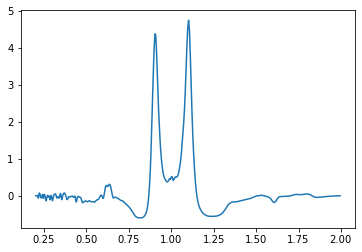

In [80]:
plt.plot(fargo3d.r[1:],((pv_original-pv_original_init)/pv_original_init).mean(axis=0), label = '3d_disk')
#plt.ylim(-.5,1.5)
#plt.xlim(.5,2)